In [140]:
from bs4 import BeautifulSoup
import requests 

In [141]:
# Response object called url. We can get all the information we need from this object.
url = requests.get('https://redditmetrics.com/top')

In [142]:
# Passing url through Beautiful Soup gives us a BeautifulSoup object, which represents the document as a nested data structure
soup = BeautifulSoup(url.text, 'html.parser')
#We could use 'lxml' as a parser for a fast parsing. 

In [143]:
#Create a file, and write all the subreddit names to that file
with open('subreddits.txt', 'w') as f:
    #Get all the a tags containing subreddits names
    for subreddit in soup.find_all('a'):
        try:
            #Skip the other a tag not containing subreddits
            if '/r/' in subreddit.string and 'TrendingReddits' not in subreddit.string:
                #Cut down the firt 3 caracters '/r/'
                f.write(subreddit.string[3:]+'\n')
        except:
            TypeError 

In [144]:
#Importing Python Reddit API Wrapper
import praw
#Importing TextBlob to dive into common natural language processing (NLP) tasks such as sentiment analysis.
from textblob import TextBlob
import math

In [145]:
#Authenticating via OAuth
reddit = praw.Reddit(client_id='5oAc4IlyG1Spxw',
                    client_secret='oMYS5S7-GvJ3jqcmFa9L7eaoFbY',
                     user_agent='SentimentalAnalysis100subreddits')

In [158]:
#Setting up a max number of fetched comments from every subreddit
max_number_comment = 1000
#Opening the file containing one subreddit per line
with open('subreddits.txt', 'r') as f:
    #Creating a dictionnary for saving results
    results = {}
    for line in f:
        #Obtaning an instance of Subreddit class for subreddit in 'line'
        #strip() removes whitespace in 'line'
        subreddit = reddit.subreddit(line.strip())
        #Creating a variable to keep track of subreddit's global sentiment value
        sub_sentiment = 0
        #Fetching the max_number_comment newly created comments of the current subreddit
        for comment in subreddit.comments(limit=max_number_comment):
            #Creating a TextBlob object containing the current comment 
            blob = TextBlob(comment.body)
            #Getting the polarity score which is within the range [-1.0, 1.0]
            comment_sentiment = blob.sentiment.polarity
            #Adding comment's current polarity value to the global sentiment value
            sub_sentiment += comment_sentiment
        #Displaying current subreddit's name
        print('/r/' + str(subreddit.display_name))
        try:
            #Printing subreddi's polarity value
            print('Ratio: ' + str(sub_sentiment) + '\n')
            #Appending the two lists with subreddit's name and it polarity value
            results['\''+ str(line.strip()) + '\''] = sub_sentiment
            subreddits_list.append(line.strip())
            sub_sentiment_values.append(sub_sentiment)
        except:
            print('No comment sentiment.' + '\n')
            ZeroDivisionError

        

            

/r/announcements
Ratio: 63.832582222481975

/r/funny
Ratio: 59.317416336898866

/r/AskReddit
Ratio: 63.23639068502114

/r/todayilearned
Ratio: 79.87939710129459

/r/science
Ratio: 59.15497973033651

/r/worldnews
Ratio: 39.840448483913555

/r/pics
Ratio: 103.15799383722715

/r/IAmA
Ratio: 92.42304726071589

/r/gaming
Ratio: 66.7763457942062

/r/videos
Ratio: 66.3283672526093

/r/movies
Ratio: 89.06288609267109

/r/aww
Ratio: 119.3037861138032

/r/Music
Ratio: 129.43962539558152

/r/blog
Ratio: 63.54755586109642

/r/gifs
Ratio: 93.95612751109988

/r/news
Ratio: 39.3471601658053

/r/explainlikeimfive
Ratio: 77.81467284901005

/r/askscience
Ratio: 36.26461265742399

/r/EarthPorn
Ratio: 190.3774432398675

/r/books
Ratio: 84.92988071095861

/r/television
Ratio: 97.60483835621898

/r/mildlyinteresting
Ratio: 64.00299229934144

/r/LifeProTips
Ratio: 84.33135300059877

/r/Showerthoughts
Ratio: 52.947494393850675

/r/space
Ratio: 99.4184172887343

/r/DIY
Ratio: 122.45683917748899

/r/Jokes
Ratio

In [159]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

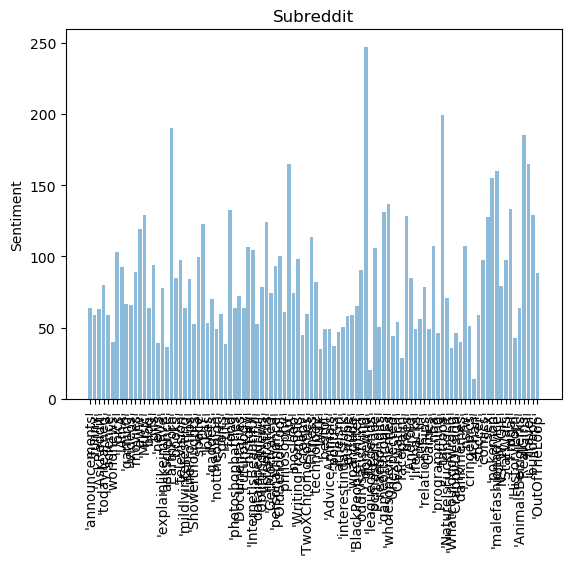

'4chan' : 14/1000</br>
'leagueoflegends' : 20/1000</br>
'facepalm' : 29/1000</br>
'WTF' : 34/1000</br>
'Whatcouldgowrong' : 35/1000</br>
'askscience' : 36/1000</br>
'politics' : 37/1000</br>
'tifu' : 38/1000</br>
'news' : 39/1000</br>
'worldnews' : 39/1000</br>
'dankmemes' : 40/1000</br>
'HistoryPorn' : 43/1000</br>
'Unexpected' : 43/1000</br>
'creepy' : 45/1000</br>
'CrappyDesign' : 46/1000</br>
'programming' : 46/1000</br>
'atheism' : 47/1000</br>
'lifehacks' : 49/1000</br>
'Games' : 49/1000</br>
'nottheonion' : 49/1000</br>
'AdviceAnimals' : 49/1000</br>
'bestof' : 49/1000</br>
'reactiongifs' : 50/1000</br>
'interestingasfuck' : 50/1000</br>
'cringepics' : 51/1000</br>
'dataisbeautiful' : 52/1000</br>
'Showerthoughts' : 52/1000</br>
'Jokes' : 53/1000</br>
'Overwatch' : 54/1000</br>
'me_irl' : 56/1000</br>
'europe' : 58/1000</br>
'woahdude' : 58/1000</br>
'soccer' : 59/1000</br>
'science' : 59/1000</br>
'funny' : 59/1000</br>
'sports' : 59/1000</br>
'TwoXChromosomes' : 59/1000</br>
'

In [172]:
# y axis values
plt.bar(np.arange(100), results.values(), align='center', alpha=0.5)
# x axis values
plt.xticks(np.arange(100), results.keys(), rotation='vertical')
# y axis label
plt.ylabel('Sentiment')
plt.title('Subreddit')
#saving the graph into a png image
plt.savefig('Top100SubredditsSentiment.png')
plt.show()
#Printing subreddits with their respective polarity values, ascending.
polarity_values = sorted(list(results.values()))
for v in polarity_values:
    for subreddit in results.keys():
        if results[subreddit] == v:
            print (str(subreddit) + " : " + str(int(v)) +'/1000</br>')

